In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Lovy Dhankhar\\Desktop\\DEVP Python\\End Term Project\\13-Fraud Detection.csv')

In [3]:
data = df.iloc[:10000]
data.shape

(10000, 11)

In [4]:
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [5]:
data.tail()

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
9995     7   PAYMENT     466.73   C517929856          881.0          414.27   
9996     7   PAYMENT    8239.66  C1483641522        11515.0         3275.34   
9997     7   PAYMENT    6063.34   C728110179        31409.0        25345.66   
9998     7  TRANSFER  317806.64  C1021138110        10901.0            0.00   
9999     7   PAYMENT    5096.16   C299358529        60472.0        55375.84   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
9995  M2128130537             0.0             0.0        0               0  
9996  M1108211033             0.0             0.0        0               0  
9997   M277524255             0.0             0.0        0               0  
9998  C1935506329        103168.0             0.0        0               0  
9999   M176755220             0.0             0.0        0               0

In [6]:
data.shape

(10000, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 859.5+ KB


In [8]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
# Checking for null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
data.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  10000.000000  1.000000e+04   1.000000e+04    1.000000e+04   
mean       4.178900  1.035467e+05   8.939330e+05    9.152741e+05   
std        2.479821  2.663072e+05   2.135683e+06    2.181428e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        1.000000  4.397530e+03   1.276875e+02    0.000000e+00   
50%        5.000000  1.285874e+04   2.137556e+04    1.034994e+04   
75%        7.000000  1.143825e+05   1.782719e+05    1.760934e+05   
max        7.000000  1.000000e+07   1.293042e+07    1.301050e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.000000e+04    1.000000e+04  10000.000000         10000.0  
mean     9.342758e+05    1.096606e+06      0.006800             0.0  
std      2.676340e+06    3.014496e+06      0.082185             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    0.000000e+00      0.000000             0.0  
50%      0.000000e+00    0.000000e+00      0.000000             0.0  
75%      2.831067e+05    2.520552e+05      0.000000             0.0  
max      1.951612e+07    1.916920e+07      1.000000             0.0

In [12]:
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [13]:
data.isFraud.value_counts()

0    9932
1      68
Name: isFraud, dtype: int64

In [14]:
data.isFlaggedFraud.value_counts()

0    10000
Name: isFlaggedFraud, dtype: int64

In [15]:
data.type.value_counts()

PAYMENT     5465
CASH_IN     1949
CASH_OUT    1321
TRANSFER     921
DEBIT        344
Name: type, dtype: int64

In [16]:
pd.crosstab(data['type'] , data['isFraud'])
# Fraud is only done through CASH_PUT and Transfer methods

isFraud      0   1
type              
CASH_IN   1949   0
CASH_OUT  1286  35
DEBIT      344   0
PAYMENT   5465   0
TRANSFER   888  33

In [17]:
pd.crosstab(data['type'] , data['isFlaggedFraud'])
# Only flags marked are in the TRANSFER method

isFlaggedFraud     0
type                
CASH_IN         1949
CASH_OUT        1321
DEBIT            344
PAYMENT         5465
TRANSFER         921

In [18]:
pd.crosstab(data['isFraud'] , data['isFlaggedFraud'])
# All the 16 values that were flagged, were actual frauds
# 8197 frauds that happened were not flagged

isFlaggedFraud     0
isFraud             
0               9932
1                 68

In [19]:
Flaggedperstep = pd.crosstab(data['step'] , data['isFlaggedFraud'])
Flaggedperstep

isFlaggedFraud     0
step                
1               2708
2               1014
3                552
4                565
5                665
6               1660
7               2836

In [20]:
Fraudperstep = pd.crosstab(data['step'] , data['isFraud'])
Fraudperstep

isFraud     0   1
step             
1        2692  16
2        1006   8
3         548   4
4         555  10
5         659   6
6        1638  22
7        2834   2

In [21]:
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [22]:
data[['amount','type']].sort_values('amount')
# CASH_OUT method is used for low amounts whereasTRANSFER method is used for high amounts

amount      type
7847         2.39   PAYMENT
5364         3.75   PAYMENT
5231         4.36   PAYMENT
9245         6.36   PAYMENT
2070         6.42   PAYMENT
...           ...       ...
4442   2930418.44  TRANSFER
9635   2940764.72  TRANSFER
1153   3776389.09  TRANSFER
4441  10000000.00  CASH_OUT
4440  10000000.00  TRANSFER

[10000 rows x 2 columns]

In [23]:
data.amount.mean()
# Average transaction amount

103546.68994900018

In [24]:
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [25]:
data.groupby('type')['amount'].mean()
# Mean amount sent via each method
# TRANSFER method has the highest mean amount sent 

type
CASH_IN     168041.492468
CASH_OUT    173507.343543
DEBIT         3576.593721
PAYMENT       7891.430867
TRANSFER    471654.518914
Name: amount, dtype: float64

In [26]:
data = data.drop(['nameOrig', 'nameDest'], axis = 1)

In [27]:
data.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0

In [28]:
data['errorbalanceOrig'] = data.newbalanceOrig + data.amount - data.oldbalanceOrg
data['errorbalanceDest'] = data.oldbalanceDest + data.amount - data.newbalanceDest

In [29]:
data[['errorbalanceDest','isFraud']].sort_values('errorbalanceDest')

errorbalanceDest  isFraud
84        -17889168.70        0
88        -17127661.31        0
89        -15698609.84        0
94        -13973722.78        0
96        -13392428.52        0
...                ...      ...
1490        5233732.72        0
1520        5353303.68        0
1714        5390778.98        0
4440       10000000.00        1
4340       13191233.98        0

[10000 rows x 2 columns]

In [30]:
data.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  errorbalanceOrig  errorbalanceDest  
0             0.0        0               0               0.0           9839.64  
1             0.0        0               0               0.0           1864.28  
2             0.0        1               0               0.0            181.00  
3             0.0        1               0               0.0          21363.00  
4             0.0        0               0               0.0          11668.14

In [31]:
sns.countplot(x = 'type', data = data)
# PAYMENT is the most preferred method and DEBIT is the least preferred one

<AxesSubplot:xlabel='type', ylabel='count'>

In [32]:
sns.barplot(x = 'type', y = 'amount', data = data)
# Maximum amount is sent via TRANSFER and the least via DEBIT and PAYMENT

<AxesSubplot:xlabel='type', ylabel='amount'>

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

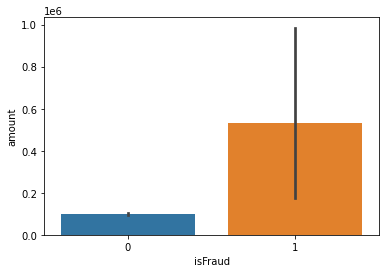

In [33]:
sns.barplot(x = 'isFraud', y = 'amount', data = data)

In [34]:
data.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  errorbalanceOrig  errorbalanceDest  
0             0.0        0               0               0.0           9839.64  
1             0.0        0               0               0.0           1864.28  
2             0.0        1               0               0.0            181.00  
3             0.0        1               0               0.0          21363.00  
4             0.0        0               0               0.0          11668.14

<AxesSubplot:xlabel='type', ylabel='amount'>

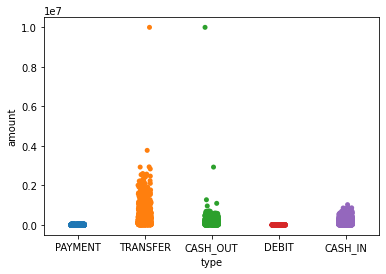

In [40]:
sns.stripplot(x = 'type', y = 'amount', data = data)
# Maximum amount is sent via TRANSFER and the least by DEBIT and PAYMENT

<AxesSubplot:xlabel='type', ylabel='errorbalanceOrig'>

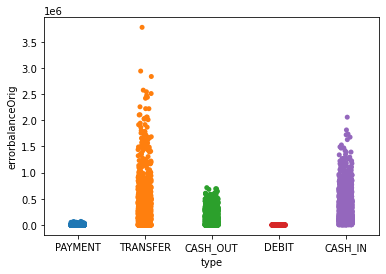

In [41]:
sns.stripplot(x = 'type', y = 'errorbalanceOrig', data = data)

In [42]:
sns.stripplot(x = 'type', y = 'errorbalanceDest', data = data)

<AxesSubplot:xlabel='type', ylabel='errorbalanceDest'>

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

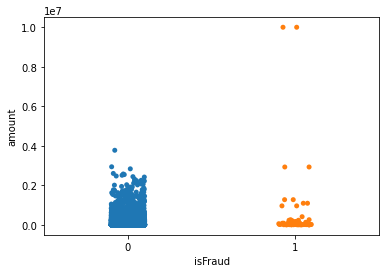

In [43]:
sns.stripplot(x = 'isFraud', y = 'amount', data = data)
# Mostly frauds done for small amounts except for some where large amount frauds were done

<AxesSubplot:xlabel='isFraud', ylabel='errorbalanceOrig'>

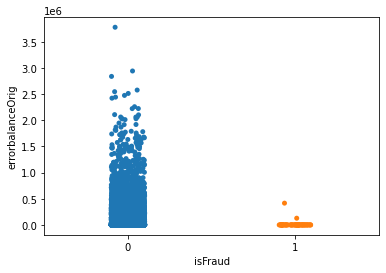

In [44]:
sns.stripplot(x = 'isFraud', y = 'errorbalanceOrig', data = data)
# There are only a few cases when eroor balance at origin is not zero in case of fraud

<AxesSubplot:xlabel='isFraud', ylabel='errorbalanceDest'>

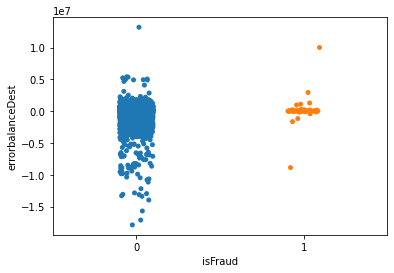

In [45]:
sns.stripplot(x = 'isFraud', y = 'errorbalanceDest', data = data)

In [48]:
data_corr = data.corr()
data_corr

step    amount  oldbalanceOrg  newbalanceOrig  \
step              1.000000  0.019939      -0.032296       -0.031383   
amount            0.019939  1.000000       0.123194        0.089860   
oldbalanceOrg    -0.032296  0.123194       1.000000        0.996727   
newbalanceOrig   -0.031383  0.089860       0.996727        1.000000   
oldbalanceDest    0.032180  0.347842       0.228128        0.236321   
newbalanceDest    0.027742  0.412863       0.198181        0.202469   
isFraud          -0.011858  0.133586      -0.012607       -0.033084   
isFlaggedFraud         NaN       NaN            NaN             NaN   
errorbalanceOrig  0.022372  0.765254       0.274307        0.294478   
errorbalanceDest  0.008165 -0.049495       0.048051        0.048179   

                  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  \
step                    0.032180        0.027742 -0.011858             NaN   
amount                  0.347842        0.412863  0.133586             NaN   
oldbalanceOrg           0.228128        0.198181 -0.012607             NaN   
newbalanceOrig          0.236321        0.202469 -0.033084             NaN   
oldbalanceDest          1.000000        0.944481 -0.021004             NaN   
newbalanceDest          0.944481        1.000000 -0.010887             NaN   
isFraud                -0.021004       -0.010887  1.000000             NaN   
isFlaggedFraud               NaN             NaN       NaN             NaN   
errorbalanceOrig        0.464540        0.493073 -0.037150             NaN   
errorbalanceDest       -0.081752       -0.394110  0.012739             NaN   

                  errorbalanceOrig  errorbalanceDest  
step                      0.022372          0.008165  
amount                    0.765254         -0.049495  
oldbalanceOrg             0.274307          0.048051  
newbalanceOrig            0.294478          0.048179  
oldbalanceDest            0.464540         -0.081752  
newbalanceDest            0.493073         -0.394110  
isFraud                  -0.037150          0.012739  
isFlaggedFraud                 NaN               NaN  
errorbalanceOrig          1.000000         -0.041113  
errorbalanceDest         -0.041113          1.000000

In [49]:
data.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  errorbalanceOrig  errorbalanceDest  
0             0.0        0               0               0.0           9839.64  
1             0.0        0               0               0.0           1864.28  
2             0.0        1               0               0.0            181.00  
3             0.0        1               0               0.0          21363.00  
4             0.0        0               0               0.0          11668.14

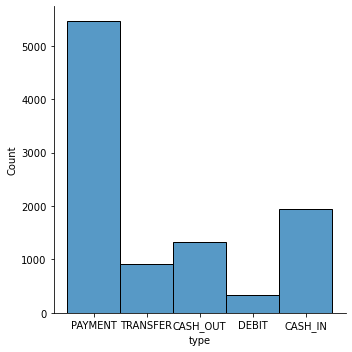

In [50]:
ax = sns.displot(data.type)
# DIstribution of type

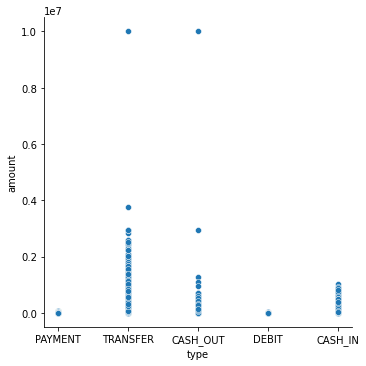

In [54]:
sns.relplot(x='type',y='amount',kind='scatter',cmap='winter',data=data)
# Maximum amount is sent via TRANSFER

In [55]:
sns.relplot(x='step',y='amount',kind='scatter',cmap='winter',data=data)
# Maximum amount is sent in the 1 and 7 steps

<AxesSubplot:xlabel='isFraud', ylabel='type'>

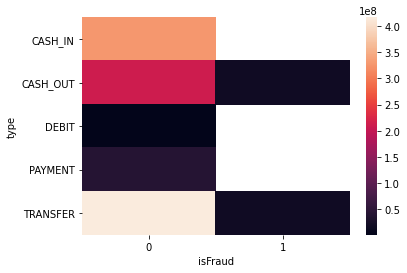

In [57]:
grouped = data.groupby(['type','isFraud'])
data_heat = grouped['amount'].sum().unstack()
sns.heatmap(data_heat)

<AxesSubplot:xlabel='isFlaggedFraud', ylabel='type'>

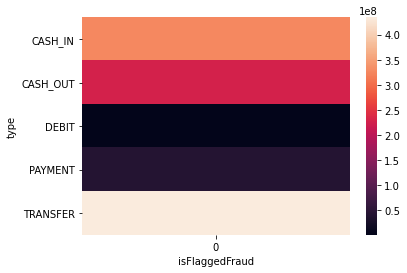

In [58]:
grouped = data.groupby(['type','isFlaggedFraud'])
data_heat = grouped['amount'].sum().unstack()
sns.heatmap(data_heat)

In [59]:
grouped = data.groupby(['step','isFlaggedFraud'])
data_heat = grouped['amount'].sum().unstack()
sns.heatmap(data_heat)

<AxesSubplot:xlabel='isFlaggedFraud', ylabel='step'>

<AxesSubplot:xlabel='isFraud', ylabel='step'>

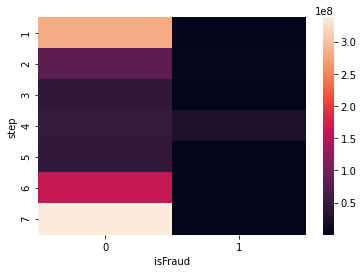

In [61]:
grouped = data.groupby(['step','isFraud'])
data_heat = grouped['amount'].sum().unstack()
sns.heatmap(data_heat)

In [62]:
data.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  errorbalanceOrig  errorbalanceDest  
0             0.0        0               0               0.0           9839.64  
1             0.0        0               0               0.0           1864.28  
2             0.0        1               0               0.0            181.00  
3             0.0        1               0               0.0          21363.00  
4             0.0        0               0               0.0          11668.14

In [64]:
cross = pd.crosstab(data.type, data.step)
cross

step         1    2    3    4    5     6     7
type                                          
CASH_IN    527  203  124  136  131   300   528
CASH_OUT   388  104   52   77   61   174   465
DEBIT      148   71   25   16   24    21    39
PAYMENT   1369  555  316  294  419  1003  1509
TRANSFER   276   81   35   42   30   162   295

<AxesSubplot:xlabel='step', ylabel='type'>

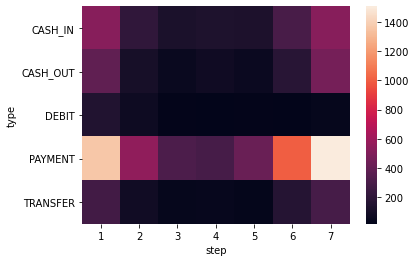

In [65]:
sns.heatmap(cross)

In [78]:
data.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  errorbalanceOrig  errorbalanceDest  
0             0.0        0               0               0.0           9839.64  
1             0.0        0               0               0.0           1864.28  
2             0.0        1               0               0.0            181.00  
3             0.0        1               0               0.0          21363.00  
4             0.0        0               0               0.0          11668.14

In [69]:
import altair as alt

In [70]:
df1 = data.iloc[:4500]
df1.shape

(4500, 11)

In [80]:
alt.Chart(df1).mark_circle().encode(
x='amount',
y='type',
color='isFraud',
tooltip= ['amount', 'type', 'isFraud', 'isFlaggedFraud']
).interactive()

alt.Chart(...)

In [81]:
alt.Chart(df1).mark_circle().encode(
x='amount',
y='errorbalanceOrig',
color='isFraud',
tooltip= ['amount', 'type', 'isFraud', 'isFlaggedFraud']
).interactive()

alt.Chart(...)

In [82]:
alt.Chart(df1).mark_circle().encode(
x='amount',
y='errorbalanceDest',
color='isFraud',
tooltip= ['amount', 'type', 'isFraud', 'isFlaggedFraud']
).interactive()

alt.Chart(...)

In [89]:
alt.Chart(df1).mark_rect().encode(
alt.X('amount', bin=True),
alt.Y('errorbalanceDest', bin=True),
alt.Color('type',
scale=alt.Scale(scheme='greenblue'),
legend=alt.Legend(title='Type')
)
).interactive()

alt.Chart(...)

In [90]:
alt.Chart(df1).mark_rect().encode(
alt.X('amount', bin=True),
alt.Y('errorbalanceOrig', bin=True),
alt.Color('type',
scale=alt.Scale(scheme='greenblue'),
legend=alt.Legend(title='Type')
)
).interactive()

alt.Chart(...)

In [91]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [92]:
data1 = data.select_dtypes(include=['float64','int64'])

In [93]:
data1

step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        1    9839.64       170136.0       160296.36             0.0   
1        1    1864.28        21249.0        19384.72             0.0   
2        1     181.00          181.0            0.00             0.0   
3        1     181.00          181.0            0.00         21182.0   
4        1   11668.14        41554.0        29885.86             0.0   
...    ...        ...            ...             ...             ...   
9995     7     466.73          881.0          414.27             0.0   
9996     7    8239.66        11515.0         3275.34             0.0   
9997     7    6063.34        31409.0        25345.66             0.0   
9998     7  317806.64        10901.0            0.00        103168.0   
9999     7    5096.16        60472.0        55375.84             0.0   

      newbalanceDest  isFraud  isFlaggedFraud  errorbalanceOrig  \
0                0.0        0               0              0.00   
1                0.0        0               0              0.00   
2                0.0        1               0              0.00   
3                0.0        1               0              0.00   
4                0.0        0               0              0.00   
...              ...      ...             ...               ...   
9995             0.0        0               0              0.00   
9996             0.0        0               0              0.00   
9997             0.0        0               0              0.00   
9998             0.0        0               0         306905.64   
9999             0.0        0               0              0.00   

      errorbalanceDest  
0              9839.64  
1              1864.28  
2               181.00  
3             21363.00  
4             11668.14  
...                ...  
9995            466.73  
9996           8239.66  
9997           6063.34  
9998         420974.64  
9999           5096.16  

[10000 rows x 10 columns]

In [111]:
type = pd.get_dummies(data1['type'])
type

KeyError: 'type'

In [112]:
data1.drop('type', axis=1, inplace=True)

KeyError: "['type'] not found in axis"

In [113]:
data1.head()

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  errorbalanceOrig  errorbalanceDest  
0             0.0        0               0               0.0           9839.64  
1             0.0        0               0               0.0           1864.28  
2             0.0        1               0               0.0            181.00  
3             0.0        1               0               0.0          21363.00  
4             0.0        0               0               0.0          11668.14

In [114]:
data1 = pd.concat([data1,type], axis=1)

In [115]:
data1.head()

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  errorbalanceOrig  \
0             0.0        0               0               0.0   
1             0.0        0               0               0.0   
2             0.0        1               0               0.0   
3             0.0        1               0               0.0   
4             0.0        0               0               0.0   

   errorbalanceDest  CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER  
0           9839.64        0         0      0        1         0  
1           1864.28        0         0      0        1         0  
2            181.00        0         0      0        0         1  
3          21363.00        0         1      0        0         0  
4          11668.14        0         0      0        1         0

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
ss = StandardScaler()

In [118]:
ss.fit(data1)

StandardScaler()

In [119]:
X = ss.transform(data1)

In [121]:
plt.figure(figsize = (10,8))
pd.plotting.parallel_coordinates(data1, class_column='isFraud', color=('red','blue'))

<AxesSubplot:>

<AxesSubplot:>

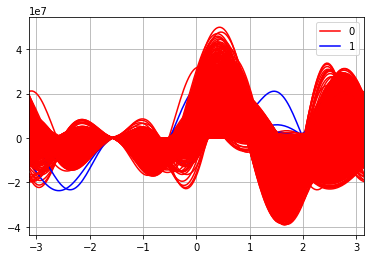

In [123]:
pd.plotting.andrews_curves(data1, class_column='isFraud', color=('red','blue'))